In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


In [2]:
#To get a very clear collapse, we choose the following parameters.
#Essentially, weare making the system interactio a diagonal matrix, ie interaction depends on coherent states.
#H = [(E_s x diag(i) + E_s2 x id)x id ] + [(E_int_s x off_diag_sqrt(i) + E_int_s2 x id) x (E_int_e x rd_mat1 + E_int_e2 x id)] + [id x (E_e x H_e_self + E_e2 x id)]
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]
s_full_list=s_list[3]

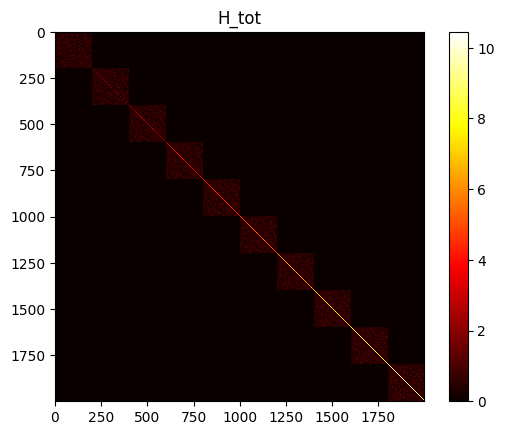

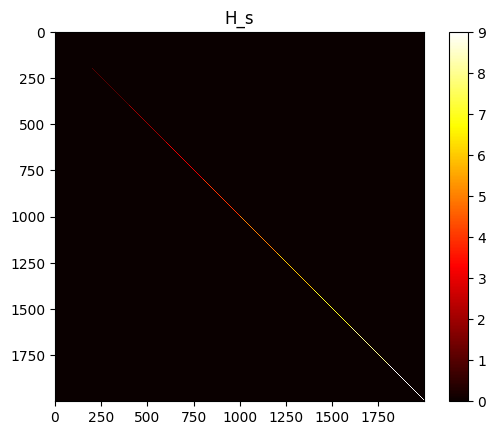

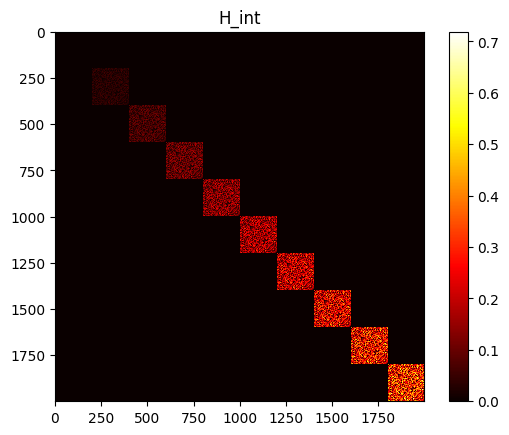

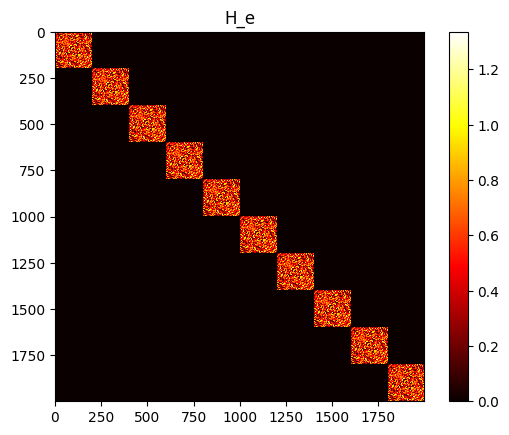

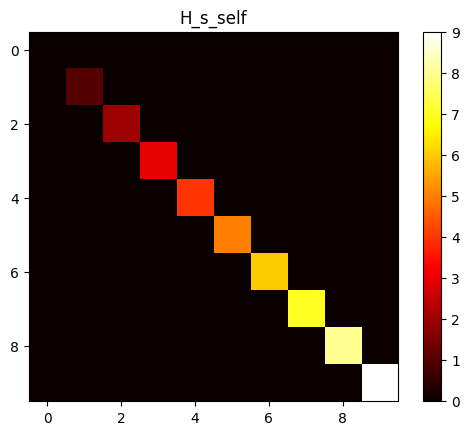

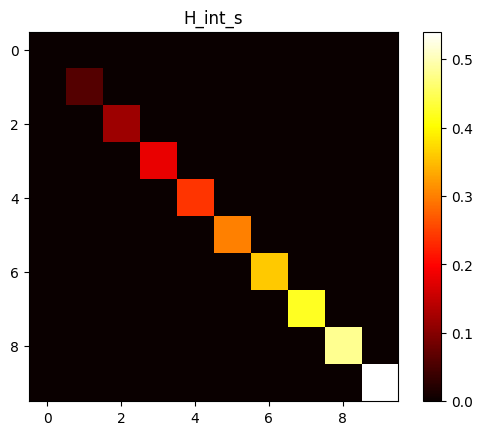

In [3]:
plot_hamiltonians(H_list)

In [4]:
gif_path = collapse_gif(eigen, s_list, info)
display_gif(gif_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

frame = 1
eig = eigen
#TODO 
#-make it also work for the environment
ind_nb=info[13]
    # Compute global min and max values for Schmidt coefficients to fix y-axis limits
if env_sys == 0:
    eigenenergies = eig[10]
    eigenstates = eig[11]
        
    all_schmidt_coefficients = []
    for frame in range(ind_nb):
        s0 = s_list[0][frame][0]
        schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates]
        all_schmidt_coefficients.extend(schmidt_coefficients0)

    max_schmidt = max(all_schmidt_coefficients)
    min_schmidt = min(all_schmidt_coefficients)
s0 = s_list[0][frame][0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates]

plt.plot(eigenenergies, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies}')
plt.title(f"Plot of the system state in its own energy eigenbasis")
plt.xlabel("Eigenstates of the system")
plt.ylabel("Schmidt Coefficients")
plt.ylim(min_schmidt, max_schmidt)  # Set fixed y-axis limits

plt.text(0.95, 0.95, f"Frame: {frame}", horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)




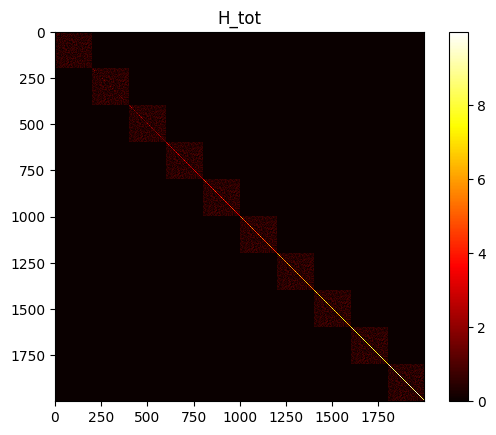

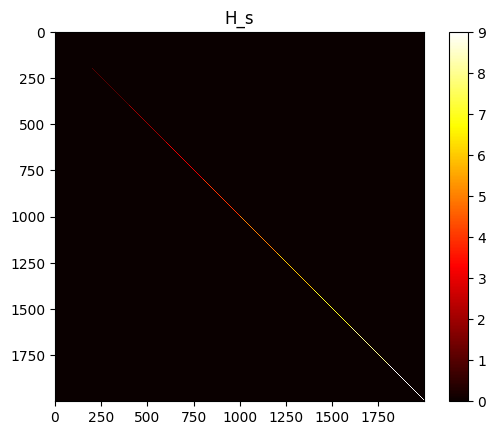

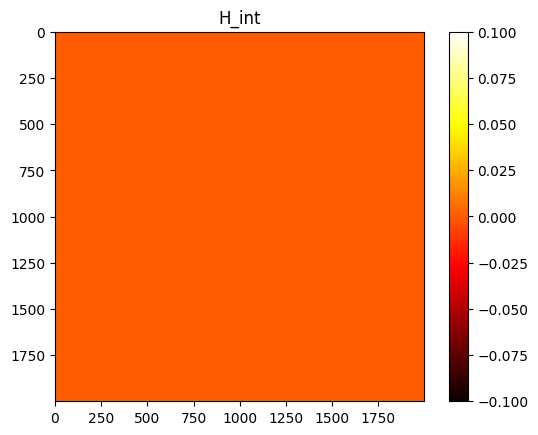

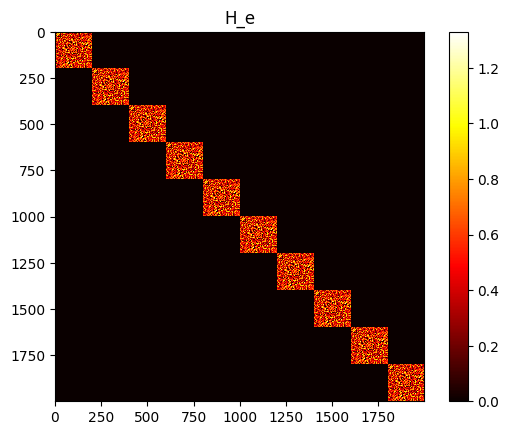

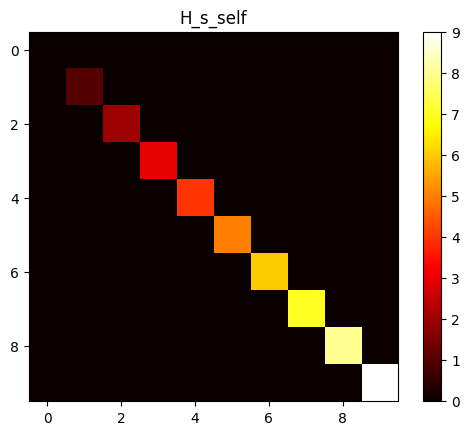

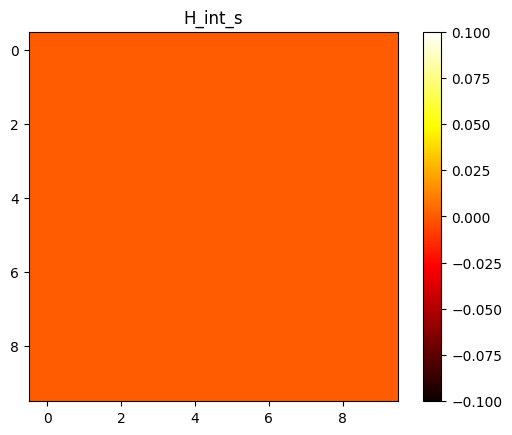

In [5]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.075; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 20; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)

plot_hamiltonians(H_list)
